In [ ]:
mkdir data

In [7]:
cd data

/content/data


In [2]:
# matplotlib日本語化のためのライブラリのインストール
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1 MB 2.7 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=b7c1753354f87dc5df5fc81370968267e3a457775a8a1509ac48bea03fac67da
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


In [3]:
# 各種ライブラリのインポート
import pandas as pd
import japanize_matplotlib
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [8]:
# csvファイルの読み込み
df = pd.read_csv('mushrooms.csv', encoding='cp932')

In [9]:
# 先頭5行表示
df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,yes,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,yes,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,yes,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,yes,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [10]:
# 末尾5行表示
df.tail(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,edible,knobbed,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8120,edible,convex,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,brown,one,pendant,buff,several,leaves
8121,edible,flat,smooth,brown,no,none,attached,close,broad,brown,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8122,poisonous,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,...,silky,white,white,partial,white,one,evanescent,white,several,leaves
8123,edible,convex,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,orange,one,pendant,orange,clustered,leaves


In [11]:
# データの均等性の確認
# 'edible'が'poisonous'の1.5倍データが存在
df['class'].value_counts()

edible       4208
poisonous    3916
Name: class, dtype: int64

In [12]:
# 欠損値の確認
# ⇒すべてfalseのため欠損値なし
df.isnull().any(axis=0)

class                       False
cap-shape                   False
cap-surface                 False
cap-color                   False
bruises                     False
odor                        False
gill-attachment             False
gill-spacing                False
gill-size                   False
gill-color                  False
stalk-shape                 False
stalk-root                  False
stalk-surface-above-ring    False
stalk-surface-below-ring    False
stalk-color-above-ring      False
stalk-color-below-ring      False
veil-type                   False
veil-color                  False
ring-number                 False
ring-type                   False
spore-print-color           False
population                  False
habitat                     False
dtype: bool

In [13]:
# ダミー化の実施
df_dummy = pd.get_dummies(df.iloc[:,1:23], drop_first=False)
df_dummy.head(5)

,cap-shape_bell,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_fibrous,cap-surface_groovesmooth,cap-surface_scaly,cap-surface_smooth,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [14]:
# ダミー化で作成したdfに、検証結果のclassを結合する
df2 = pd.concat([df['class'], df_dummy], axis=1)
df2

,class,cap-shape_bell,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_fibrous,cap-surface_groovesmooth,cap-surface_scaly,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,poisonous,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,edible,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,edible,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,poisonous,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,edible,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,edible,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8120,edible,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
8121,edible,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8122,poisonous,0,0,0,0,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0


In [15]:
# 訓練・検証データ、テストデータに分割
train_val, test = train_test_split(df2, test_size=0.2, random_state=0)

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


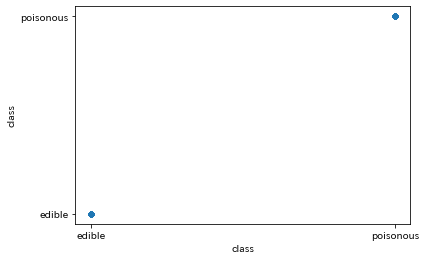

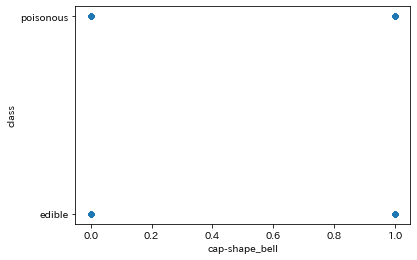

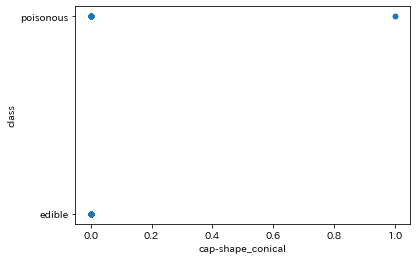

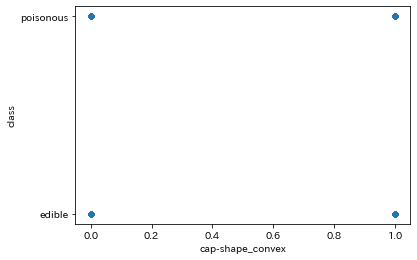

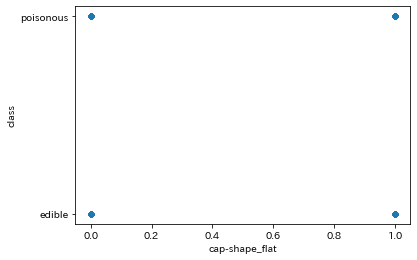

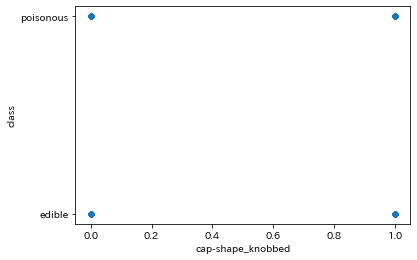

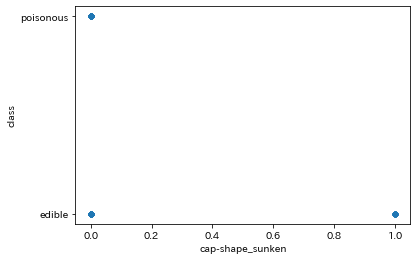

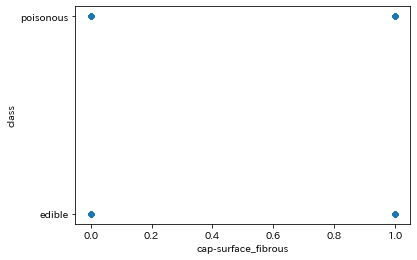

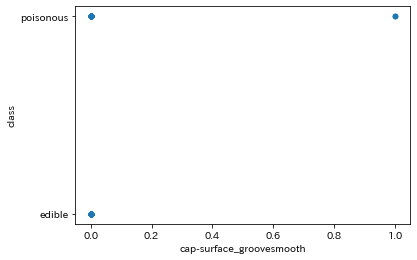

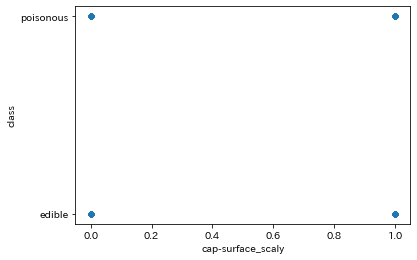

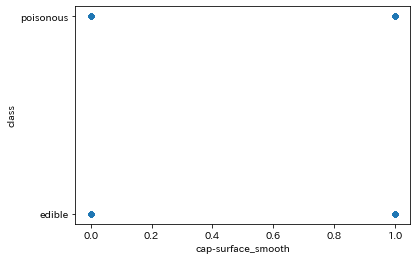

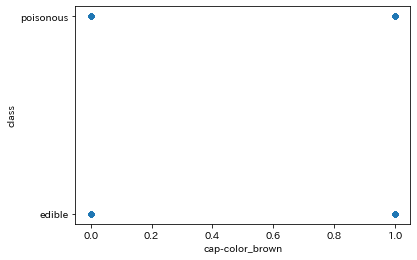

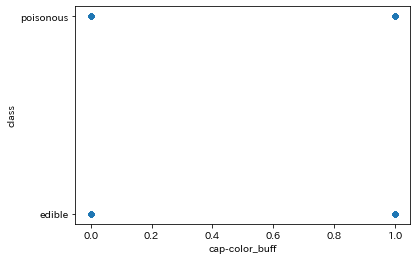

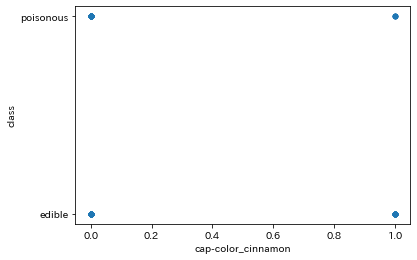

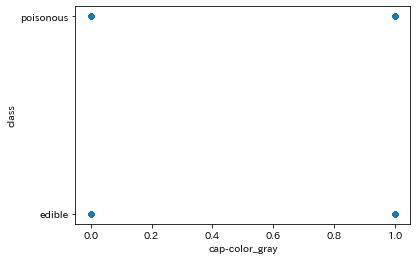

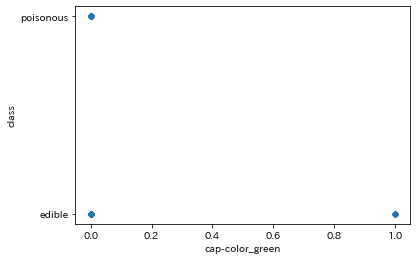

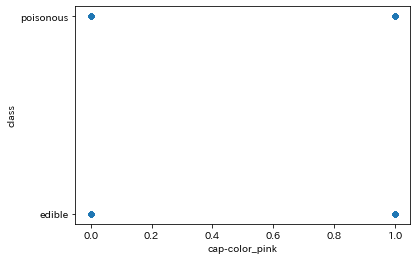

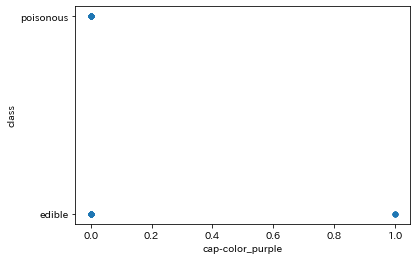

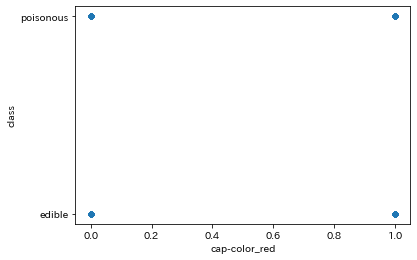

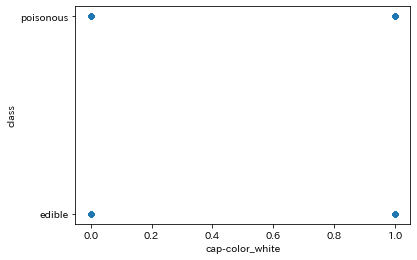

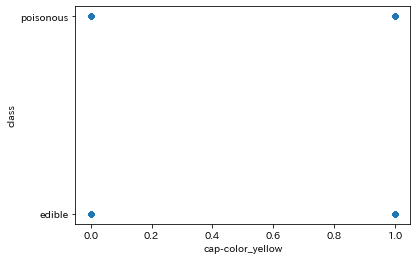

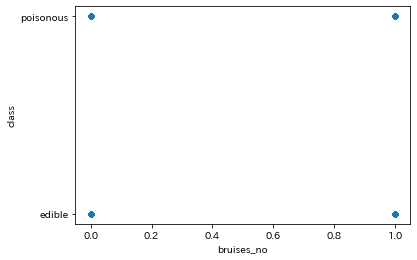

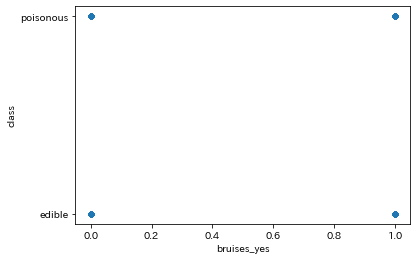

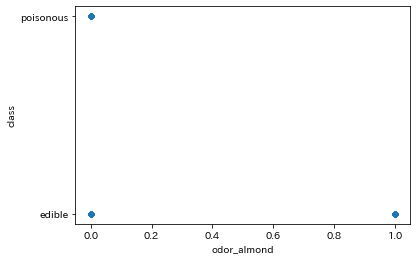

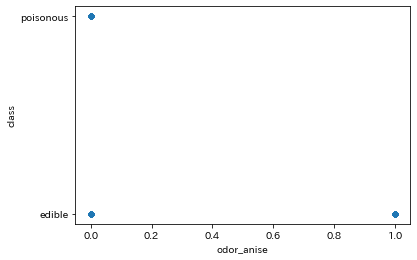

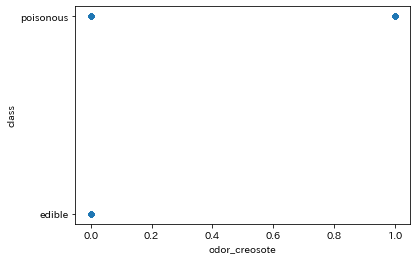

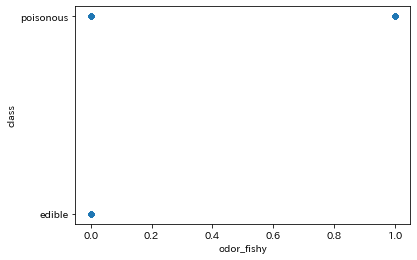

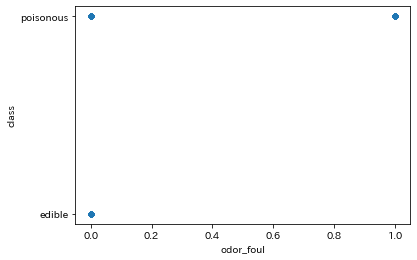

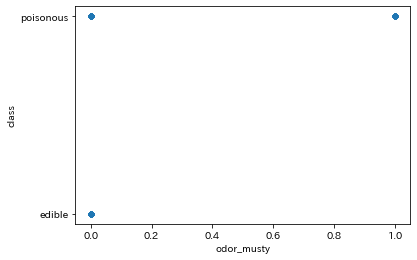

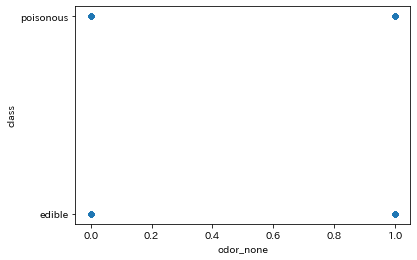

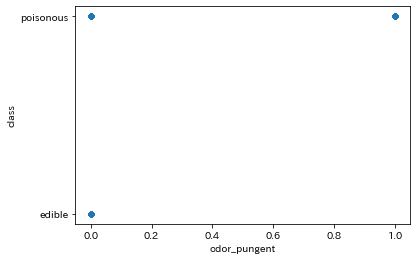

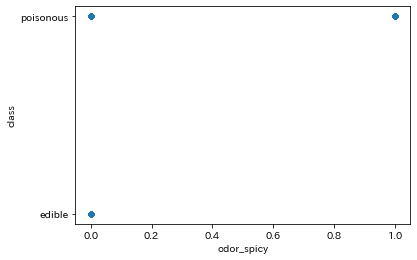

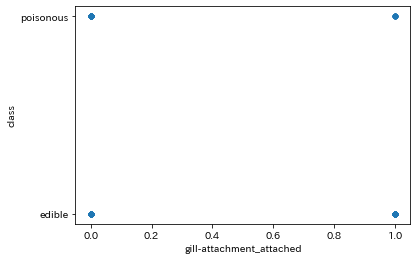

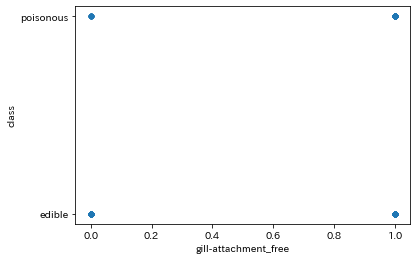

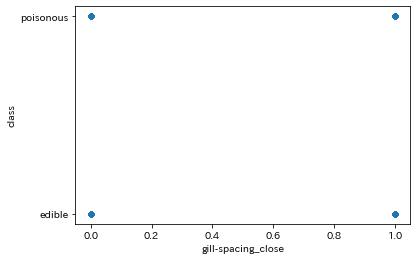

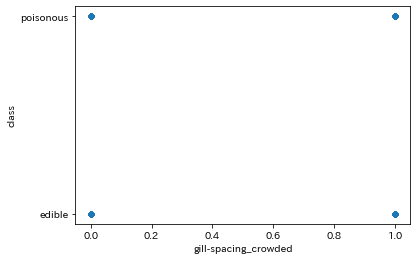

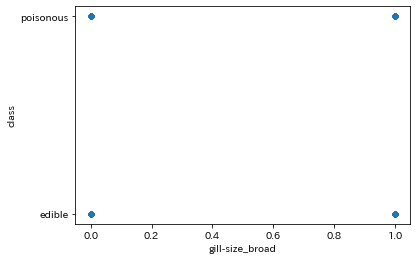

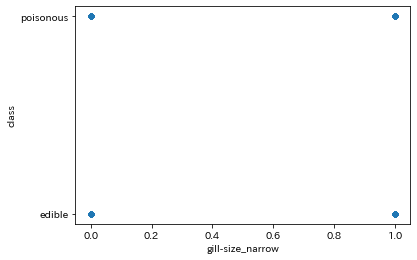

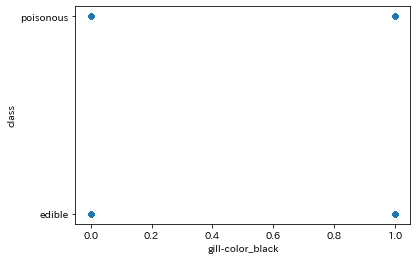

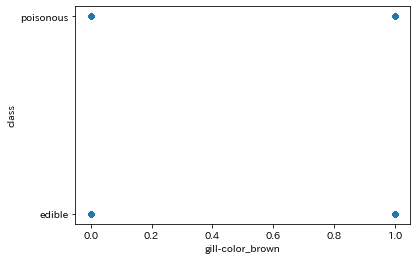

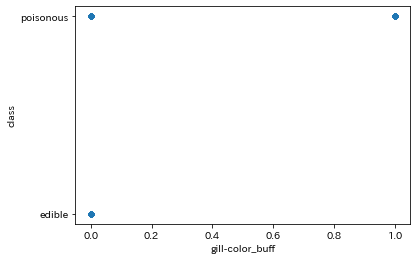

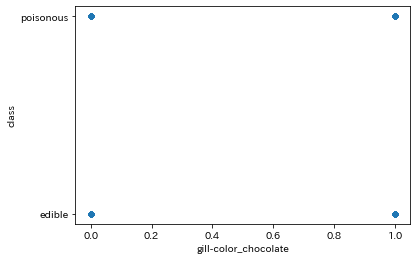

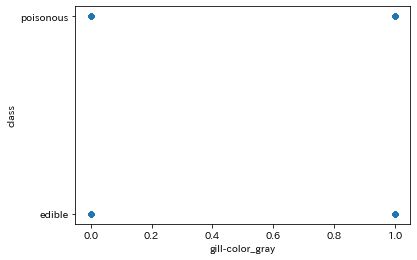

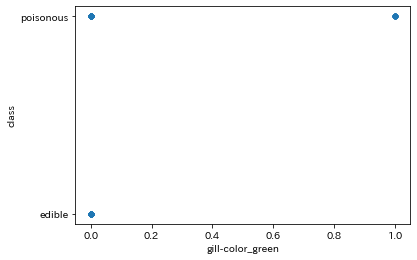

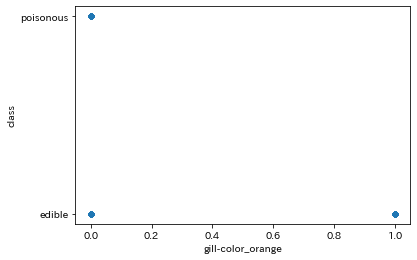

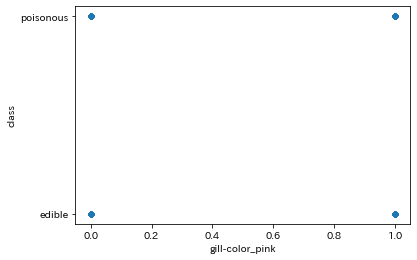

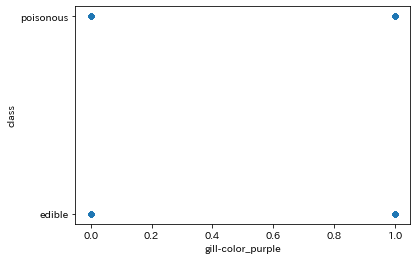

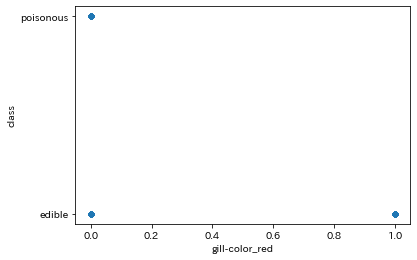

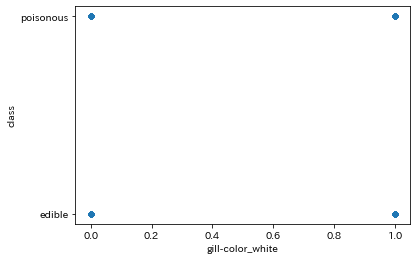

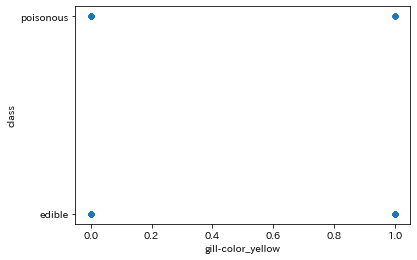

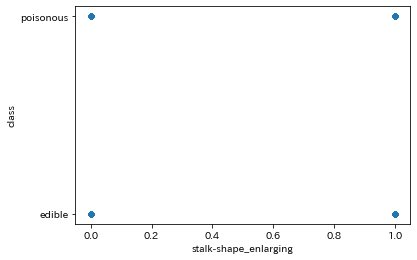

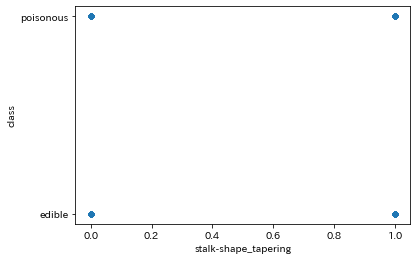

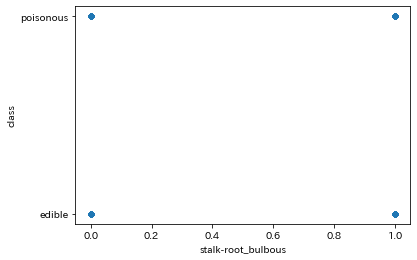

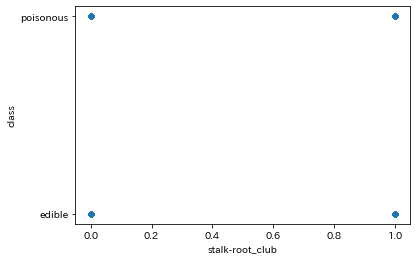

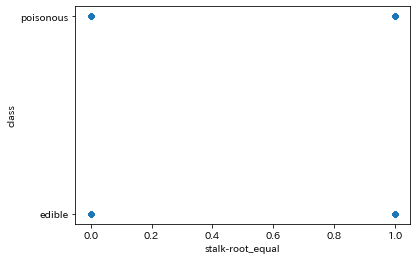

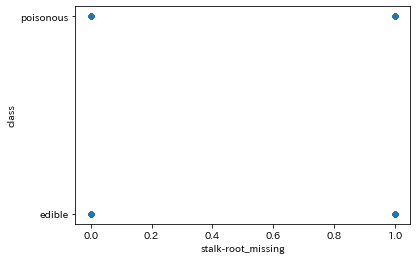

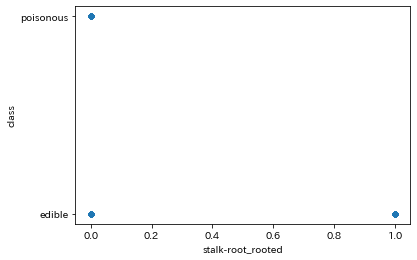

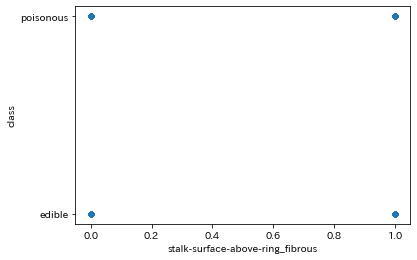

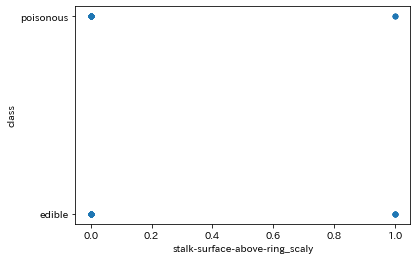

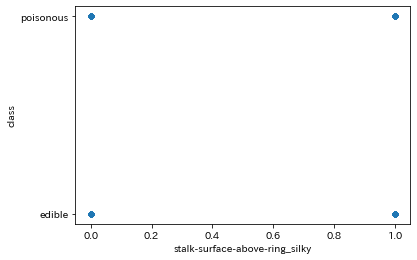

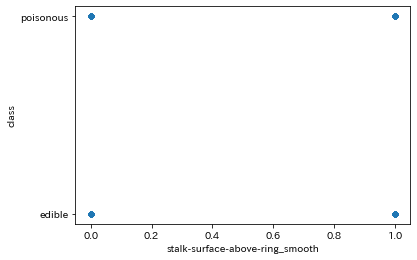

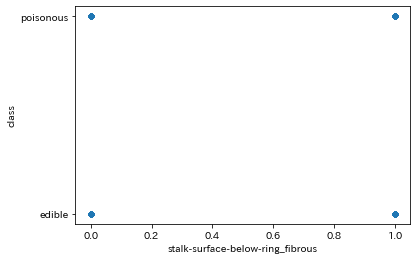

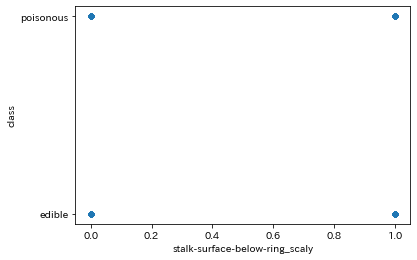

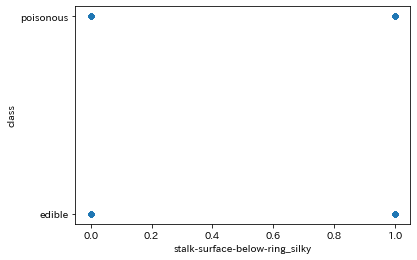

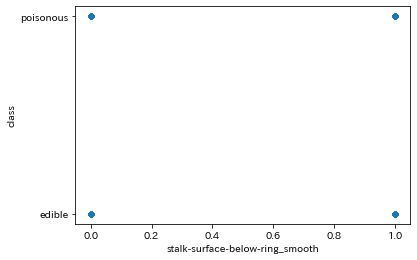

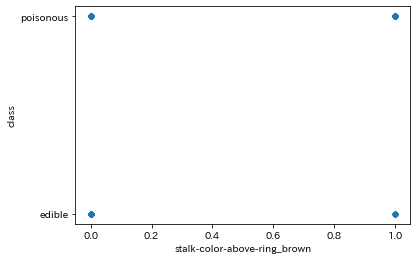

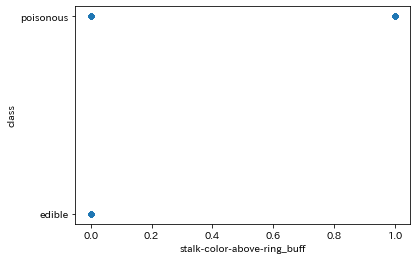

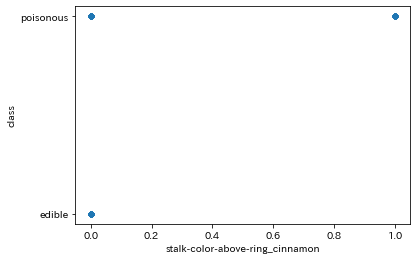

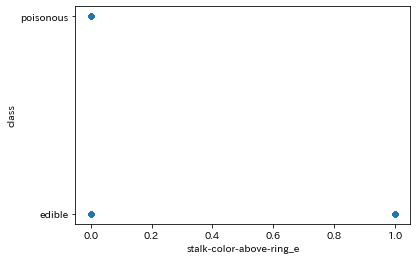

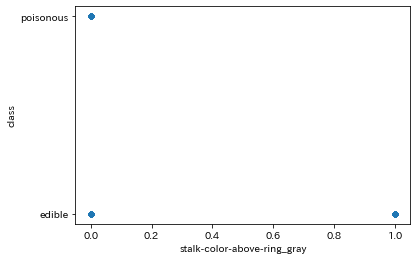

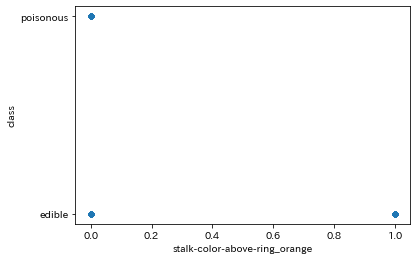

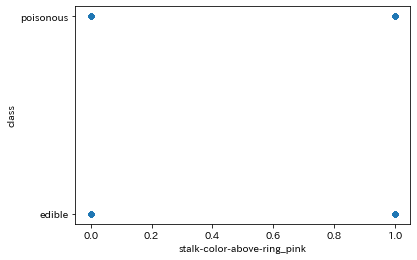

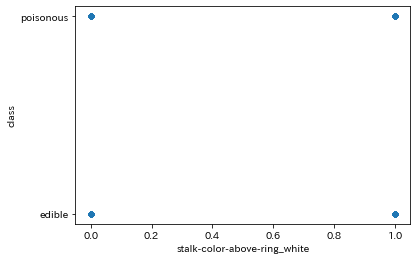

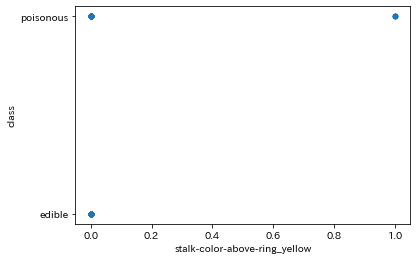

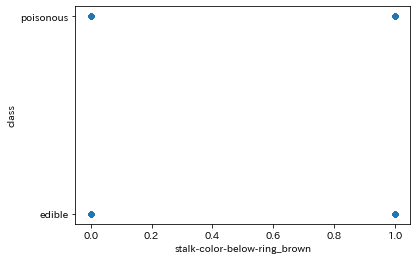

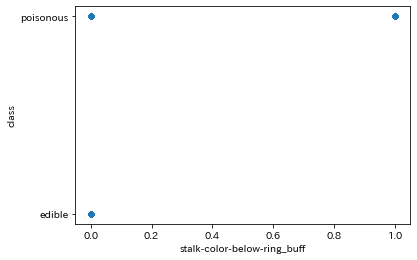

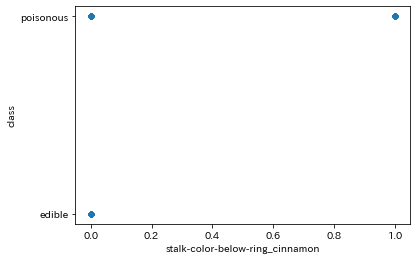

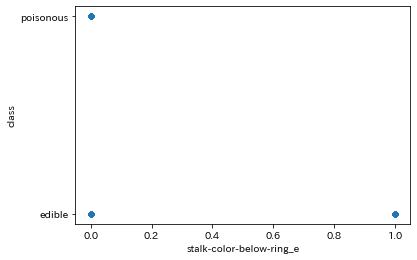

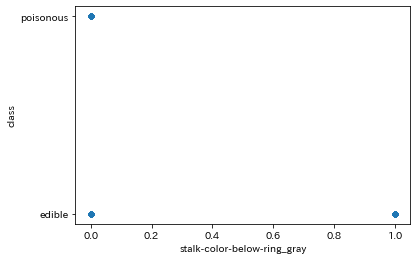

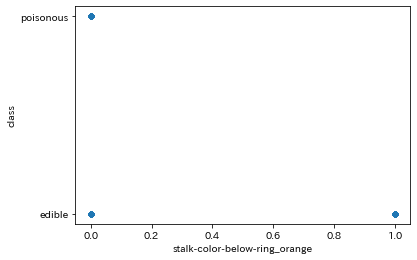

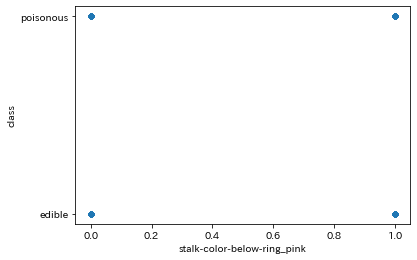

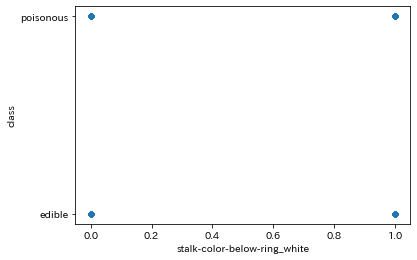

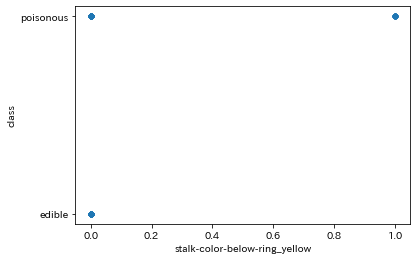

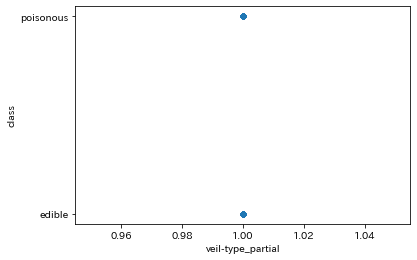

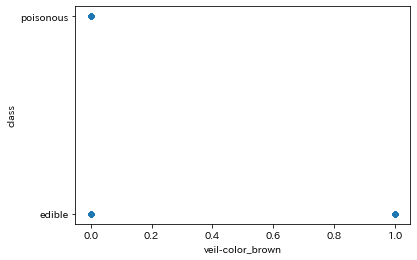

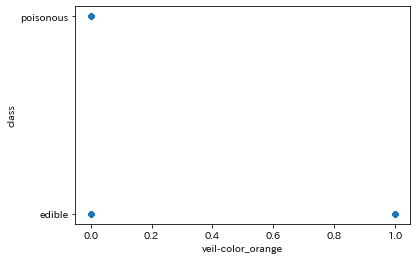

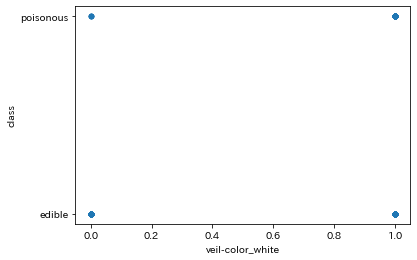

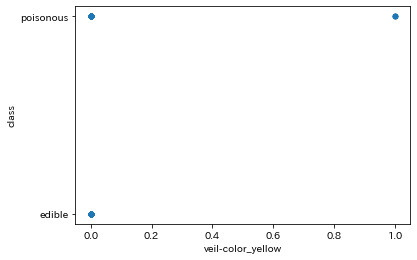

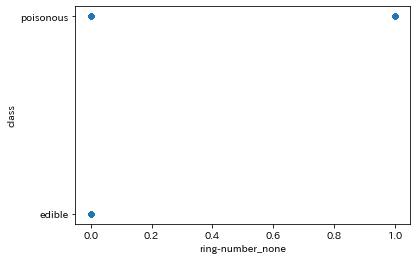

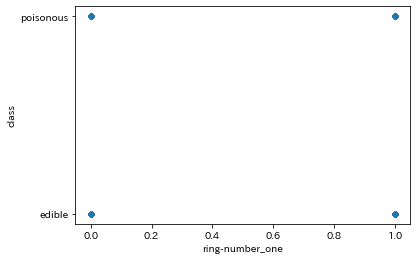

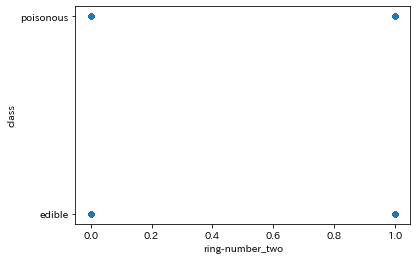

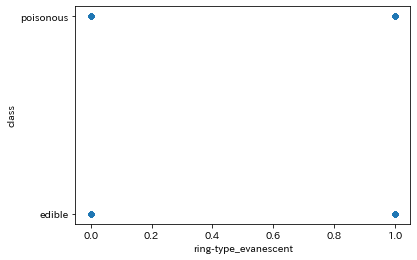

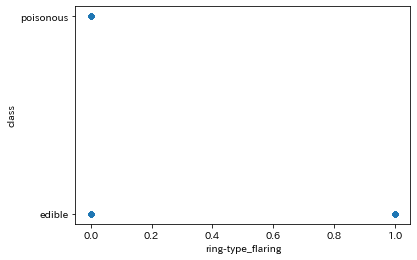

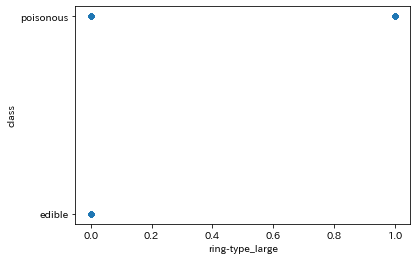

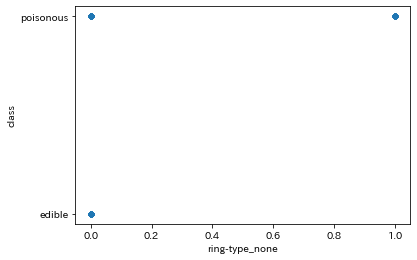

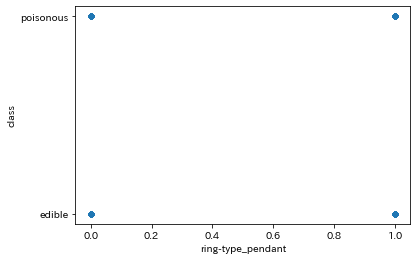

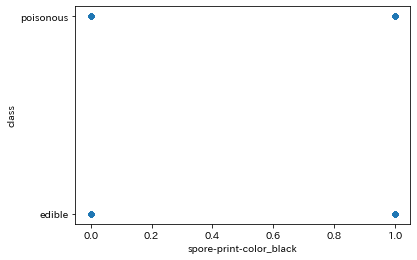

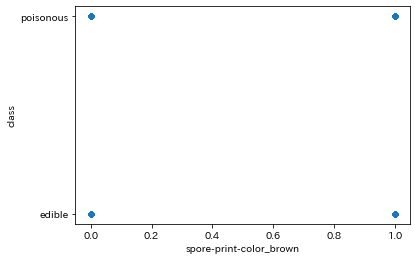

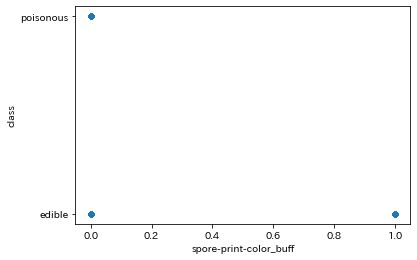

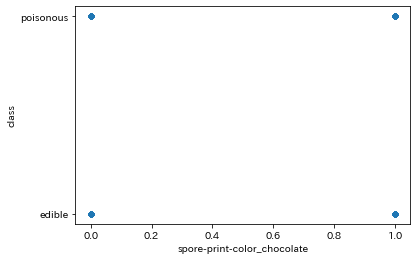

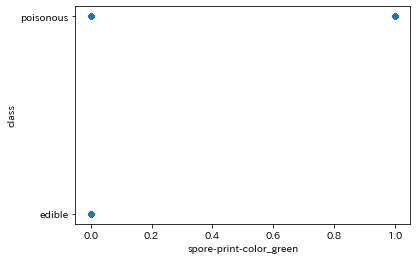

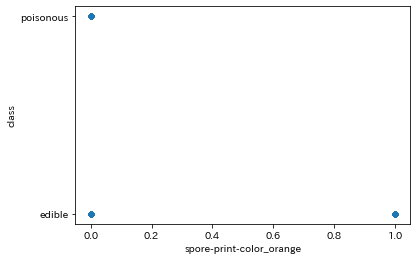

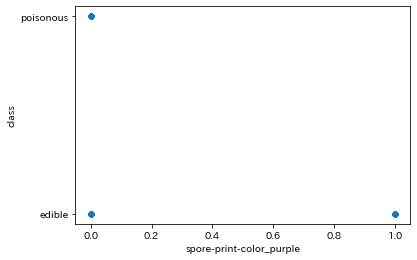

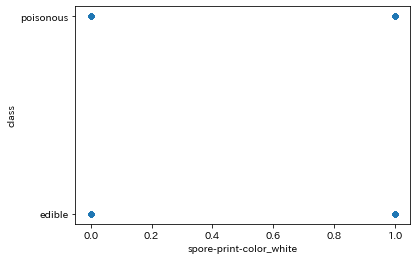

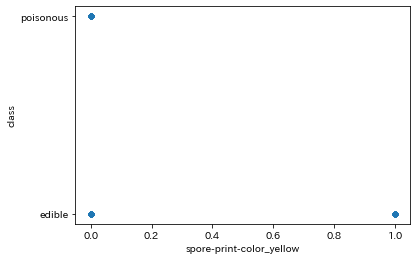

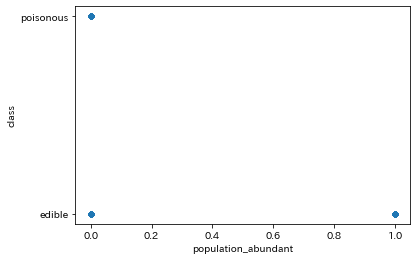

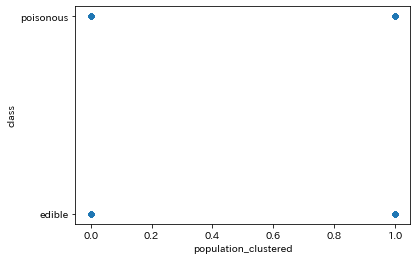

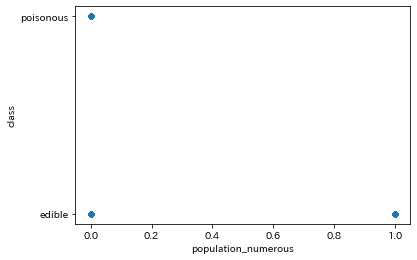

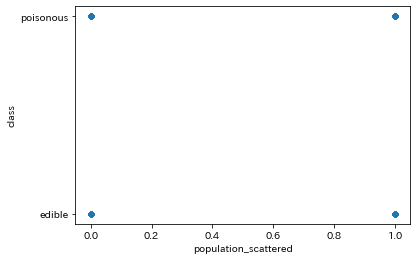

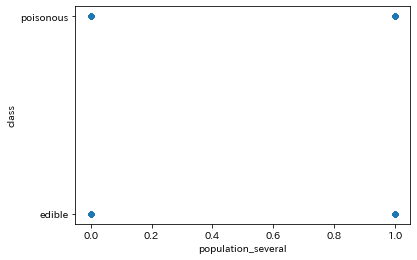

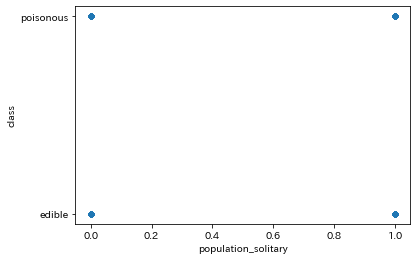

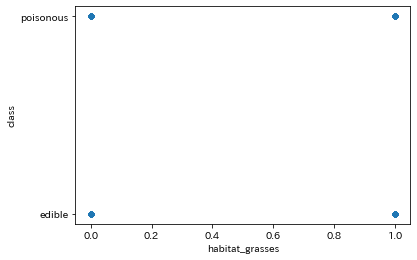

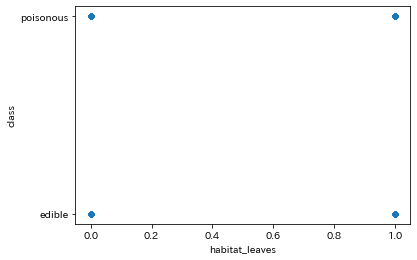

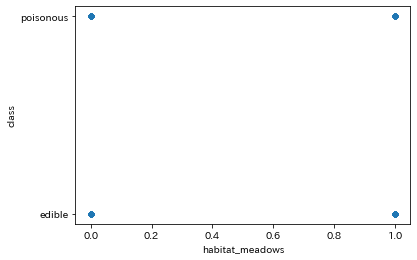

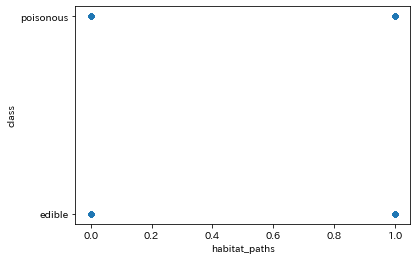

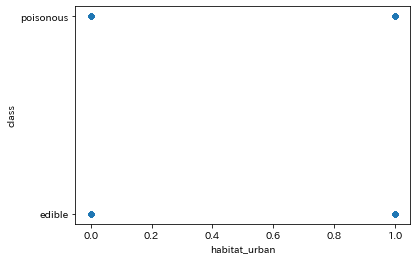

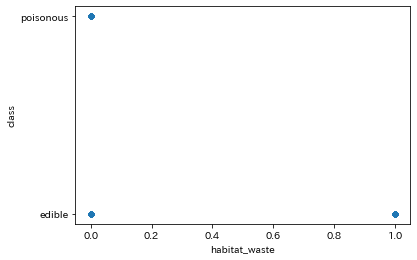

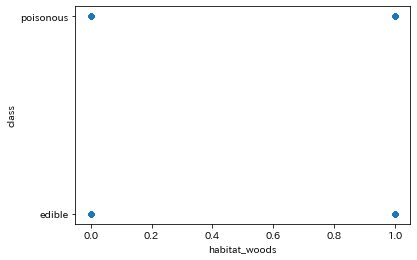

In [16]:
# 散布図の作成
# ⇒すべて0or1のデータであり、相関関係は不明
colname = train_val.columns
for name in colname:
  train_val.plot(kind='scatter', x=name, y='class')

In [17]:
# learn関数の定義
from sklearn import tree

def learn(x, t, depth=3):
  x_train, x_test, y_train, y_test = train_test_split(x, t, test_size=0.2, random_state=0)
  model = tree.DecisionTreeClassifier(max_depth=depth, random_state=0, class_weight='balanced')
  model.fit(x_train, y_train)

  score = model.score(X=x_train, y=y_train)
  score2 = model.score(X=x_test, y=y_test)

  return round(score, 3), round(score2, 3), model

In [18]:
# 深さを変化させ、成果率を探る
# ⇒結果より深さ7以上の場合、訓練データ・検証データで高い数値を出せる。
x = train_val.iloc[:, 1:]
t = train_val[['class']]

max_model = ""
max_test_score = 0

for j in range(1, 15):
  train_score, test_score, model = learn(x, t, depth=j)

  # 最高値を出すモデルを退避
  if test_score > max_test_score:
    max_test_score = test_score
    max_model = model
  
  sentence = '訓練データの正解率{}'
  sentence2 = '検証データの正解率{}'

  total_sentence = '深さ{}:' + sentence + sentence2

  print(total_sentence.format(j, train_score, test_score))

深さ1:訓練データの正解率0.886検証データの正解率0.898
深さ2:訓練データの正解率0.953検証データの正解率0.956
深さ3:訓練データの正解率0.985検証データの正解率0.988
深さ4:訓練データの正解率0.994検証データの正解率0.995
深さ5:訓練データの正解率0.999検証データの正解率1.0
深さ6:訓練データの正解率0.999検証データの正解率1.0
深さ7:訓練データの正解率1.0検証データの正解率1.0
深さ8:訓練データの正解率1.0検証データの正解率1.0
深さ9:訓練データの正解率1.0検証データの正解率1.0
深さ10:訓練データの正解率1.0検証データの正解率1.0
深さ11:訓練データの正解率1.0検証データの正解率1.0
深さ12:訓練データの正解率1.0検証データの正解率1.0
深さ13:訓練データの正解率1.0検証データの正解率1.0
深さ14:訓練データの正解率1.0検証データの正解率1.0


In [19]:
# 深さ7でテストデータの確認
x_test = test.iloc[:, 1:]
t_test = test[['class']]
test_score = max_model.score(x_test, t_test)

print(f'テストデータの正解率：{round(test_score, 3)}')

テストデータの正解率：1.0


In [20]:
# ロジスティック回帰の確認
x = train_val.iloc[:, 1:]
t = train_val['class']

# 特徴量の標準化
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc_x = sc.fit_transform(x)

x_train, x_val, y_train, y_val = train_test_split(sc_x, t, test_size=0.2, random_state=0)

# ロジスティック回帰による学習
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(random_state=0, C=0.1, multi_class='auto', solver='lbfgs')
log_model.fit(x_train, y_train)

print(f'訓練データの正解率：{log_model.score(x_train, y_train)}')
print(f'検証データの正解率：{log_model.score(x_val, y_val)}')

訓練データの正解率：1.0
検証データの正解率：1.0


In [21]:
# ロジスティック回帰でのテストデータの正解率
# ⇒ロジスティック回帰でも1.0の高い正解率となる。
x_test = test.iloc[:, 1:]
t_test = test['class']

sc_x_test = sc.fit_transform(x_test)

print(f'テストデータの正解率：{log_model.score(sc_x_test, t_test)}')

テストデータの正解率：1.0


In [22]:
# ランダムフォレストで確認
from sklearn.ensemble import RandomForestClassifier

x = train_val.iloc[:, 1:]
t = train_val['class']
x_train, x_val, y_train, y_val = train_test_split(x, t, test_size=0.2, random_state=0)

rnd_forest_model = RandomForestClassifier(n_estimators=200, random_state=0)
rnd_forest_model.fit(x_train, y_train)

print(f'訓練データの正解率：{rnd_forest_model.score(x_train, y_train)}')
print(f'検証データの正解率：{rnd_forest_model.score(x_val, y_val)}')

訓練データの正解率：1.0
検証データの正解率：1.0


In [23]:
# ランダムフォレストでのテストデータの正解率
# ⇒ランダムフォレストでも1.0の高い正解率となる。
x_test = test.iloc[:, 1:]
t_test = test['class']

print(f'テストデータの正解率：{rnd_forest_model.score(x_test, t_test)}')

テストデータの正解率：1.0


In [25]:
# アダブーストで確認
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

x = train_val.iloc[:, 1:]
t = train_val['class']
x_train, x_val, y_train, y_val = train_test_split(x, t, test_size=0.2, random_state=0)

base_model = DecisionTreeClassifier(random_state=0, max_depth=5)
adab_model = AdaBoostClassifier(random_state=0, n_estimators=100, base_estimator=base_model)
adab_model.fit(x_train, y_train)

print(f'訓練データの正解率：{adab_model.score(x_train, y_train)}')
print(f'検証データの正解率：{adab_model.score(x_val, y_val)}')

訓練データの正解率：1.0
検証データの正解率：1.0


# 上記の結果のまとめ
### 回帰木：深さ7で正解率1.0となる。
### ロジスティック回帰：1.0を確保。
### ランダムフォレスト：1.0を確保。
### アダブースト：1.0を確保

In [26]:
# モデル（決定木・ロジスティック回帰・ランダムフォレスト）の保存
import pickle

# 決定木モデル
with open('treeModel.pkl', 'wb') as f:
  pickle.dump(model, f)

# ロジスティック回帰モデル
with open('logisticModel.pkl', 'wb') as f:
  pickle.dump(log_model, f)

# ランダムフォレストモデル
with open('randomForestModel.pkl', 'wb') as f:
  pickle.dump(rnd_forest_model, f)

# ランダムフォレストモデル
with open('adab_model.pkl', 'wb') as f:
  pickle.dump(adab_model, f)
